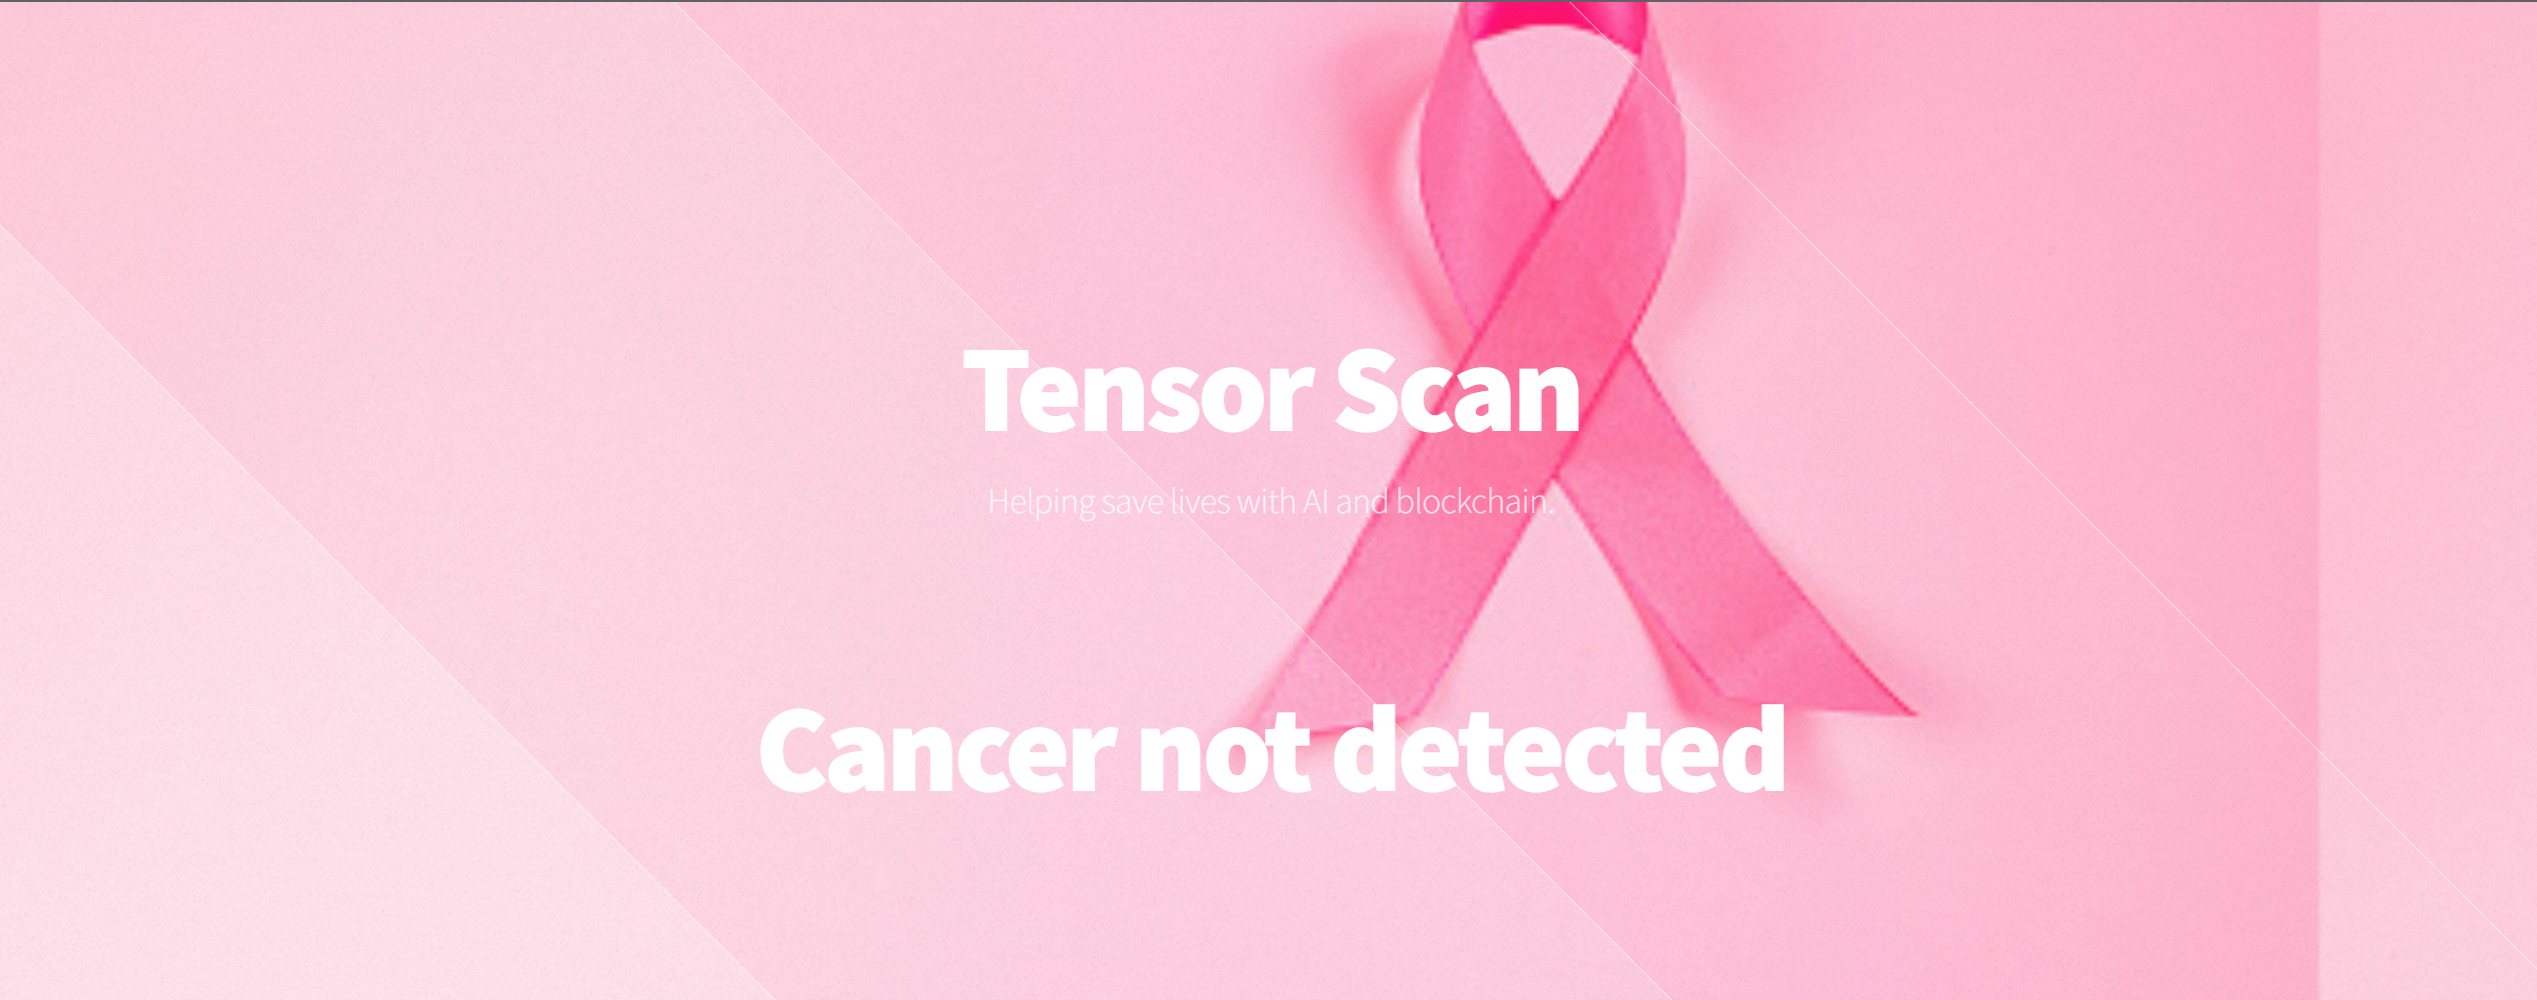

### **Introduction**

Breast cancer is the most common form of cancer in women, and when detected at an early stage, it can be treated before it spreads. 

This deep learning algorithm studies critically, thousands of images from tissues and is able to learn patterns (weights) that exist in these samples via Supervised Learning through Convolutional Neural Networks (CNN)
  
<br/><br/>
It would accurately predict the presence of Breast cancer in an image, and hence save lives.

### **Setting the environment**

In [6]:
#Set up environment
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import tensorflow as tf
from keras.utils.vis_utils import plot_model

import random

import cv2, warnings
from PIL import Image
warnings.simplefilter("ignore")

In [7]:
sns.set_theme()

### **Exploratory Data Analysis**

In [8]:
#Load Dataset

X = np.load("breast_train.npy")
y = np.load("breast_test.npy")

In [9]:
X.shape

(5547, 50, 50, 3)

In [10]:
y.shape

(5547,)

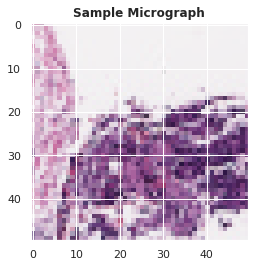

In [11]:
plt.title('Sample Micrograph', weight = "bold")
plt.imshow(X[100])

In [12]:
def random_pics1():
    '''Selects and displays images from our dataset at random
    '''

    #Selecting the random index
    rand = random.choice(tf.range(0,len(X)))
    rand2 = random.randint(0,len(X))
    rand3 = random.randint(0,len(X))
    
    #Image Display
    fig, ax = plt.subplots(1, 3, figsize=(16, 30))
    
    ax[0].imshow(X[rand])
    ax[0].set_title(f"Sample of breast histology - {X[rand].argmax()} ", weight = "bold", fontsize = 15)
    ax[1].imshow(X[rand2])
    ax[1].set_title(f"Sample of breast histology - {X[rand2].argmax()}", weight = "bold", fontsize = 15)
    ax[2].imshow(X[rand3])
    ax[2].set_title(f"Sample of breast histology - {X[rand3].argmax()}", weight = "bold", fontsize = 15)

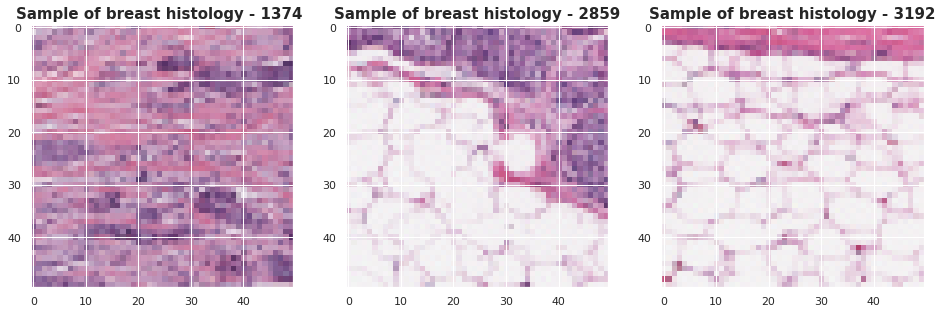

In [13]:
#Generate random images of breast histologies
random_pics1()

In [14]:
y.shape

(5547,)

In [15]:
#Confirm binary dimension of prediction array
np.unique(y)

array([0, 1])

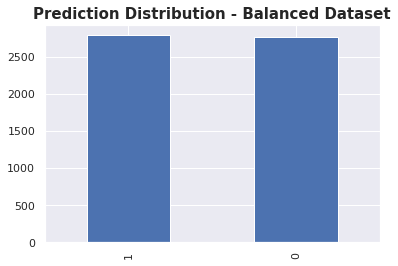

In [16]:
plt.title('Prediction Distribution - Balanced Dataset', weight = "bold", fontsize = 15)
pd.Series(y).value_counts().plot.bar()

In [17]:
X.shape, y.shape

((5547, 50, 50, 3), (5547,))

In [18]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state=42)

In [19]:
print(f"X train shape : {Xtrain.shape}")
print(f"X test shape : {Xtest.shape}")
print(f"y train shape : {ytrain.shape}")
print(f"y test shape : {ytest.shape}")

X train shape : (4160, 50, 50, 3)
X test shape : (1387, 50, 50, 3)
y train shape : (4160,)
y test shape : (1387,)


#### **Data Normalization**

In [20]:
Xtrain.min(), Xtrain.max()

(2, 255)

In [21]:
Xtest.min(), Xtest.max()

(2, 255)

In [22]:
#Normalize
pixel = 255.0 #Max Value

Xtrain_norm = Xtrain/pixel
Xtest_norm = Xtest/pixel

In [23]:
Xtrain_norm.min(), Xtrain_norm.max()

(0.00784313725490196, 1.0)

In [24]:
Xtest_norm.min(), Xtest_norm.max()

(0.00784313725490196, 1.0)

In [25]:
ytrain.min(),ytest.max()

(0, 1)

In [26]:
Xtrain_norm.shape, ytrain.shape


((4160, 50, 50, 3), (4160,))

In [27]:
Xtest_norm.shape, ytest.shape

((1387, 50, 50, 3), (1387,))

### **Model Building**

In [54]:
#Set Seed
tf.random.set_seed(42)

#Set callback - validation loss tracking
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#Build Model
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), input_shape=(50,50,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),

 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 11, 11, 32)       

In [55]:
#Callback enabled to prevent overfitting

history = model.fit(Xtrain_norm, ytrain, epochs=100, validation_data=(Xtest_norm,ytest), callbacks=[callback])

Epoch 1/100
130/130 [==============================] - 1s 7ms/step - loss: 0.6714 - accuracy: 0.5995 - val_loss: 0.6255 - val_accuracy: 0.6575
Epoch 2/100
130/130 [==============================] - 1s 5ms/step - loss: 0.5667 - accuracy: 0.7183 - val_loss: 0.5859 - val_accuracy: 0.6921
Epoch 3/100
130/130 [==============================] - 1s 5ms/step - loss: 0.5475 - accuracy: 0.7353 - val_loss: 0.5249 - val_accuracy: 0.7484
Epoch 4/100
130/130 [==============================] - 1s 5ms/step - loss: 0.5328 - accuracy: 0.7452 - val_loss: 0.5213 - val_accuracy: 0.7700
Epoch 5/100
130/130 [==============================] - 1s 5ms/step - loss: 0.5365 - accuracy: 0.7425 - val_loss: 0.5210 - val_accuracy: 0.7614
Epoch 6/100
130/130 [==============================] - 1s 5ms/step - loss: 0.5364 - accuracy: 0.7387 - val_loss: 0.5508 - val_accuracy: 0.7275
Epoch 7/100
130/130 [==============================] - 1s 5ms/step - loss: 0.5320 - accuracy: 0.7433 - val_loss: 0.5111 - val_accuracy: 0.7686

In [56]:
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [57]:
model.evaluate(Xtest_norm, ytest)

44/44 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7686


[0.5044182538986206, 0.7685652375221252]

Text(0.5, 1.0, 'Training History')

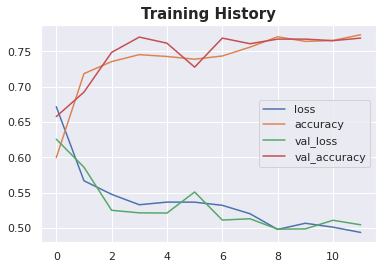

In [58]:
pd.DataFrame(history.history).plot()
plt.title("Training History", weight = "bold", fontsize = 15)

### **Model Evaluation**

In [59]:
from sklearn.metrics import classification_report as CR
ypred = model.predict(Xtest_norm).round()

In [60]:
#Classification Report

print(CR(ytest, ypred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       720
           1       0.73      0.83      0.78       667

    accuracy                           0.77      1387
   macro avg       0.77      0.77      0.77      1387
weighted avg       0.77      0.77      0.77      1387



### **Visualizing the Actual Vs.  Predicted Values**

In [61]:
np.unique(ypred)

array([0., 1.], dtype=float32)

In [62]:
names=["Non Cancerous cell", "IDC Cancerous cell"]

In [63]:
def plotting_function(model,true_class,pred_class,name,true_label):
    ran=random.randint(0,len(true_class))
    ran2=random.randint(0,len(true_class))
    ran3=random.randint(0,len(true_class))
    pred_class=model.predict(true_class)
    fig,ax=plt.subplots(1,3,figsize=(20,10))
    ax[0].imshow(true_class.reshape(1387,50,50,3)[ran])
    ax[0].set_title(f"Our model predicted: {name[tf.squeeze(model.predict(true_class).round().astype(int)).numpy().tolist()[ran]]}\n True label:{name[true_label[ran]]}")
    ax[1].imshow(true_class.reshape(1387,50,50,3)[ran2])
    ax[1].set_title(f"Our model predicted: {name[tf.squeeze(model.predict(true_class).round().astype(int)).numpy().tolist()[ran2]]},\n True label:{name[true_label[ran2]]}")
    ax[2].imshow(true_class.reshape(1387,50,50,3)[ran3])
    ax[2].set_title(f"Our model predicted: {name[tf.squeeze(model.predict(true_class).round().astype(int)).numpy().tolist()[ran3]]},\n True label:{name[true_label[ran3]]}")

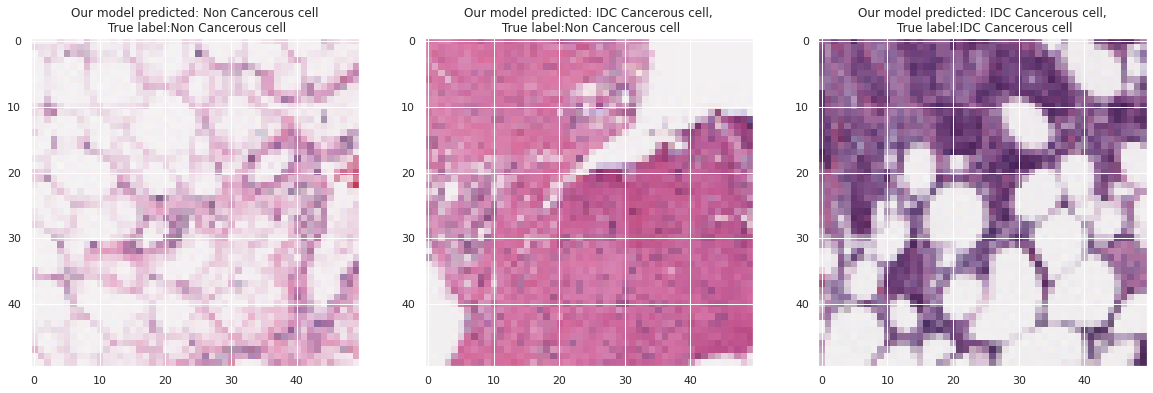

In [64]:
%matplotlib inline
plotting_function(model,Xtest_norm,ypred,names,ytest)

In [65]:
model.save("model.h5")

**Thanks for Viewing**